In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Liauchuka\AppData\Local\Temp\ipykernel_11776\2660915427.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
%matplotlib inline

In [3]:
# Get the data for training
train_file_path = 'train.csv'
dataset_df = pd.read_csv(train_file_path)
print('Train dataset shape: {}'.format(dataset_df.shape))

Train dataset shape: (1460, 81)


In [4]:
print(dataset_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
print(dataset_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print(dataset_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

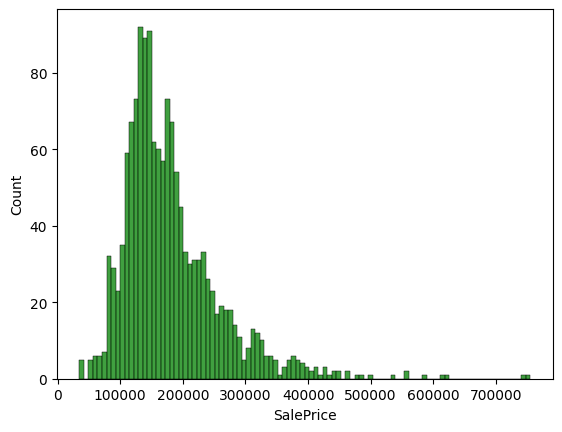

In [7]:
# Take a look at the property price distribution
sns.histplot(dataset_df['SalePrice'], color='g', bins = 100)

In [81]:
# We need to clean up these data, because SalePrice will be our target.
# first, let us remove outliers above 500 000
df_cleaned = dataset_df.copy()

# Remove entire rows where 'SalePrice' is above $500,000
df_cleaned = df_cleaned[df_cleaned['SalePrice'] <= 500000]

print(df_cleaned['SalePrice'].describe())

count      1451.000000
mean     178272.872502
std       71891.119458
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      213000.000000
max      485000.000000
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

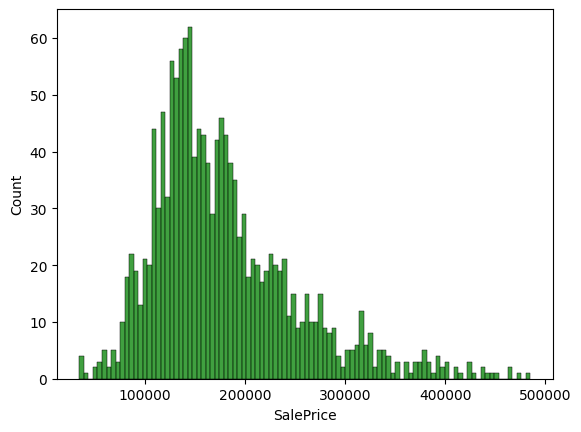

In [82]:
sns.histplot(df_cleaned['SalePrice'], color='g', bins = 100)

In [102]:
# Apply log transformation to 'SalePrice'
df_cleaned['SalePrice'] = np.log1p(df_cleaned['SalePrice'])

In [103]:
# dataset_df = dataset_df.drop('Id', axis=1)

In [104]:
# list(set(dataset_df.dtypes.tolist()))

In [105]:
#df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
#df_num.head()

In [106]:
selected_columns = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual', 'SalePrice']
new_dataset = df_cleaned[selected_columns]

# Checking the first few rows of the reduced dataset
print(new_dataset.head())

   GrLivArea  BedroomAbvGr  FullBath  OverallQual  SalePrice
0       1710             3         2            7  12.247699
1       1262             3         2            6  12.109016
2       1786             3         2            7  12.317171
3       1717             3         1            7  11.849405
4       2198             4         2            8  12.429220


In [107]:
list(set(new_dataset.dtypes.tolist()))

[dtype('float64'), dtype('int64')]

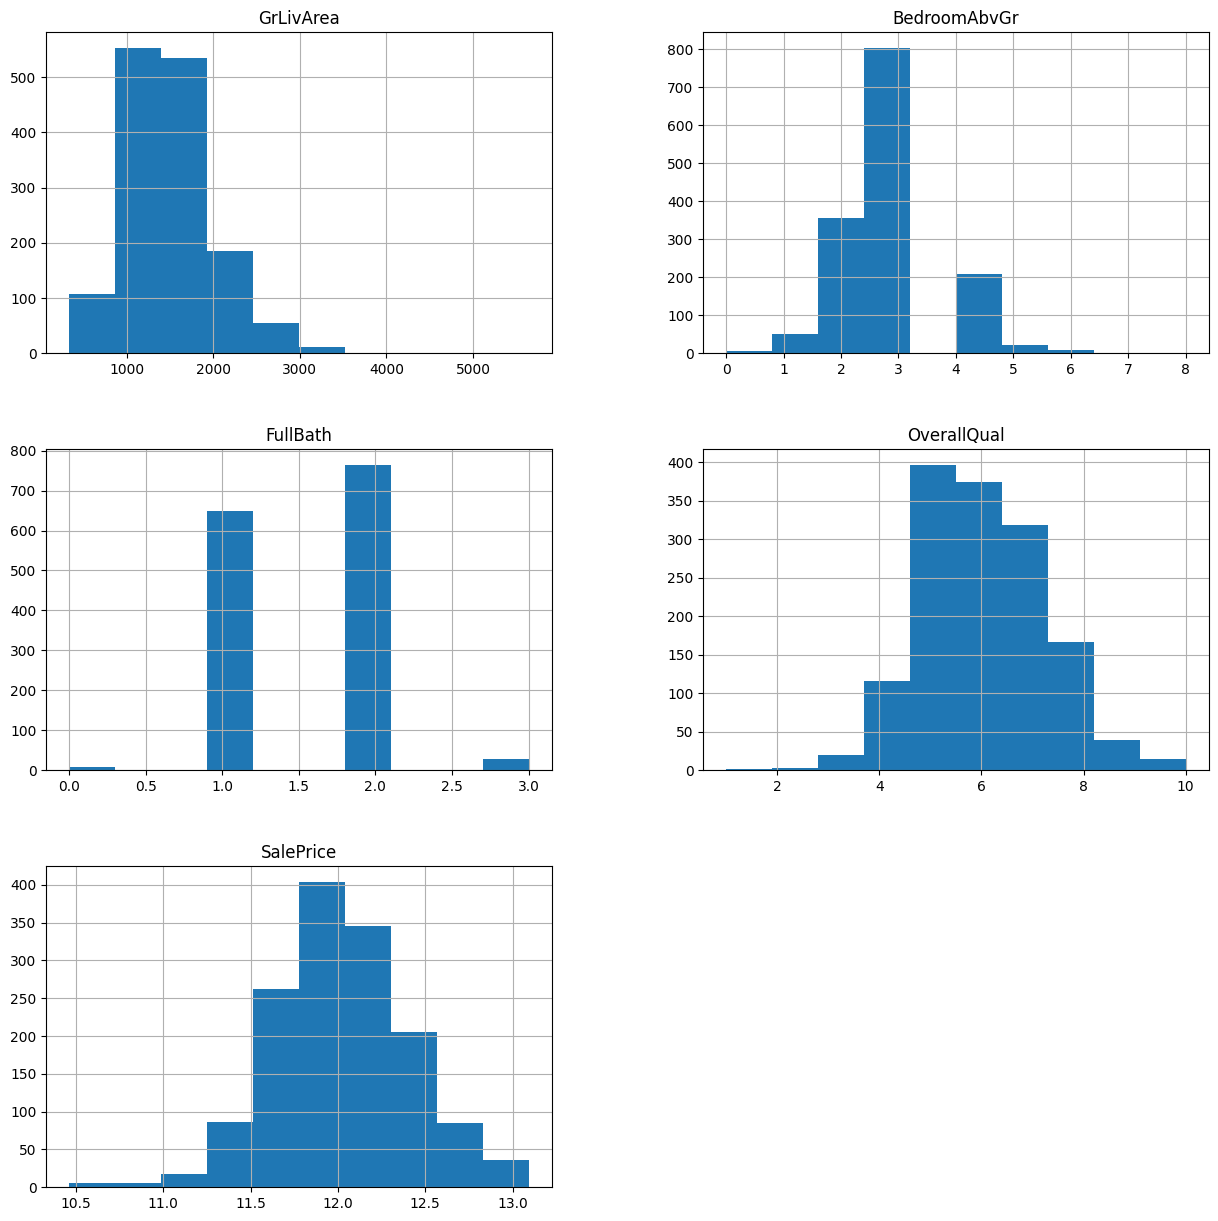

In [108]:
new_dataset.hist(figsize=(15, 15));

In [109]:
len(new_dataset)

1451

In [110]:
# Display the missing values
print("Checking for missing values: ", new_dataset.isnull().sum())

Checking for missing values:  GrLivArea       0
BedroomAbvGr    0
FullBath        0
OverallQual     0
SalePrice       0
dtype: int64


In [111]:
# commenting this out, as tfdf don't work, so I'll just switch to scikit
#def split_dataset(dataset, test_ratio = 0.3):
#    test_indices = np.random.rand(len(dataset)) < test_ratio
#    return dataset[~test_indices], dataset[test_indices]

In [112]:

# train_ds, valid_ds = split_dataset(dataset_df)
# print("Dataset splitting finished. {} items in training set, {} items in validation set.".format(len(train_ds), len(valid_ds)))

In [113]:
# Dealing with these imports one by one here, because they're buggy
# import tensorflow as tf

In [114]:
# print("TensorFlow v" + tf.__version__)

In [115]:
# Good

In [116]:
# now this one
# Of course it doesn't work, how dare I
# import tensorflow_decision_forests as tfdf

In [117]:
import sklearn

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [119]:
X = new_dataset.drop(columns=['SalePrice'])
y = new_dataset['SalePrice']

In [120]:
# make new sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)


In [121]:
# need to normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [122]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [123]:
# make predictions on the validation set
y_valid_pred = model.predict(X_valid_scaled)

In [124]:
mse = mean_squared_error(y_valid, y_valid_pred)
r2 = r2_score(y_valid, y_valid_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.03922260886960276
R-squared Score: 0.7300196262174088
